In [1]:
# import bus stop data from New Plymouth
import osmnx as ox

tags = {'highway' : 'bus_stop'}
gdf = ox.geometries_from_point((-39.057882, 174.073968), tags=tags, dist=25000)

gdf.head()

bench  bin  bus   highway public_transport shelter  \
element_type osmid                                                           
node         4583601181    no   no  yes  bus_stop         platform      no   
             4583601199    no  yes  yes  bus_stop         platform     yes   
             4583706120   NaN  NaN  yes  bus_stop         platform     yes   
             4583706121   NaN  NaN  yes  bus_stop         platform     NaN   
             4583706132   NaN  NaN  yes  bus_stop         platform     NaN   

                        tactile_paving                     geometry name  \
element_type osmid                                                         
node         4583601181             no  POINT (173.95531 -39.11440)  NaN   
             4583601199             no  POINT (173.95613 -39.11748)  NaN   
             4583706120            NaN  POINT (174.04866 -39.09024)  NaN   
             4583706121            NaN  POINT (174.04829 -39.08850)  NaN   
             4583706132            NaN  POINT (174.03555 -39.09056)  NaN   

                        covered departures_board  lit noname wheelchair  \
element_type osmid                                                        
node         4583601181     NaN              NaN  NaN    NaN        NaN   
             4583601199     NaN              NaN  NaN    NaN        NaN   
             4583706120     NaN              NaN  NaN    NaN        NaN   
             4583706121     NaN              NaN  NaN    NaN        NaN   
             4583706132     NaN              NaN  NaN    NaN        NaN   

                        name:signed  
element_type osmid                   
node         4583601181         NaN  
             4583601199         NaN  
             4583706120         NaN  
             4583706121         NaN  
             4583706132         NaN

<AxesSubplot: >

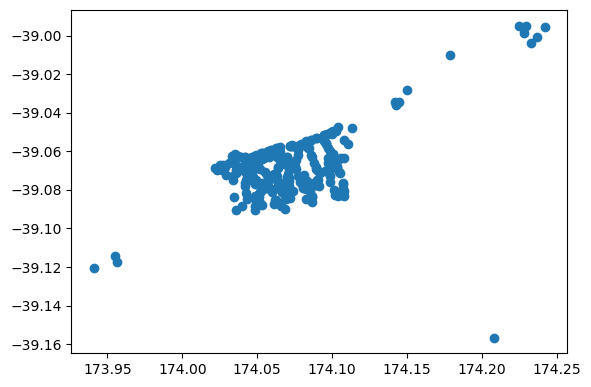

In [2]:
gdf.plot()

In [3]:
#create 400m buffer

buffer = gdf.to_crs(epsg=2193).buffer(400)





In [4]:
import geopandas as gpd

#turn buffer geometry into Geodataframe

buffer_geometry = gpd.GeoDataFrame(geometry=buffer)

In [5]:
buffer_geometry.head()

geometry
element_type osmid                                                        
node         4583601181  POLYGON ((1682989.129 5670093.304, 1682987.202...
             4583601199  POLYGON ((1683056.556 5669751.093, 1683054.630...
             4583706120  POLYGON ((1691091.039 5672685.919, 1691089.113...
             4583706121  POLYGON ((1691061.046 5672878.946, 1691059.120...
             4583706132  POLYGON ((1689956.974 5672663.198, 1689955.048...

In [6]:
#add column and assign 'Name'=Buffer

buffer_geometry['Name'] = 'Buffer'

In [7]:
buffer_geometry.head()

geometry  \
element_type osmid                                                           
node         4583601181  POLYGON ((1682989.129 5670093.304, 1682987.202...   
             4583601199  POLYGON ((1683056.556 5669751.093, 1683054.630...   
             4583706120  POLYGON ((1691091.039 5672685.919, 1691089.113...   
             4583706121  POLYGON ((1691061.046 5672878.946, 1691059.120...   
             4583706132  POLYGON ((1689956.974 5672663.198, 1689955.048...   

                           Name  
element_type osmid               
node         4583601181  Buffer  
             4583601199  Buffer  
             4583706120  Buffer  
             4583706121  Buffer  
             4583706132  Buffer

In [8]:
import leafmap as leafmap

m = leafmap.Map()



m.add_data(data=buffer_geometry, 
           column='Name', 
           zoom_to_layer=True, 
           style={"stroke": False, 
                  "color": "#34cceb", 
                  "weight": 1,
                 "opacity": 1, 
                  "fillColor": "#254373", 
                  "fillOpacity": 0.2,
                 "clickable" : True},
           layer_name='400m buffer',
          legend_title='400m buffer')



m.add_data(r'C:\Users\GSE1\Beca\3823121 - New Plymouth Bus Network Review - Documents\Job Delivery\Technical - Working Files\GIS\Bus_routes_2022.geojson', 
           column= 'Name',
          legend_title='Bus Routes',
          layer_name='Bus Routes',
          cmap='viridis',
          style={"stroke": True,
                 "weight": 2,
                 "opacity": 1, 
                 "clickable" : True},
                
          )

m.set_center(-39.057882, 174.073968, zoom=15)
m


Map(center=[174.073968, -39.057882], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title…

In [9]:
num_bus_shelters = gdf.loc[gdf['shelter'] == 'yes']

In [10]:
len(num_bus_shelters.index)

30

In [11]:
wheelchair = gdf.loc[gdf['wheelchair'] == 'yes']

In [12]:
wheelchair

,,bench,bin,bus,highway,public_transport,shelter,tactile_paving,geometry,name,covered,departures_board,lit,noname,wheelchair,name:signed
element_type,osmid,,,,,,,,,,,,,,,
node,7812245246,yes,no,yes,bus_stop,platform,no,no,POINT (173.94087 -39.12048),NaN,no,no,yes,yes,yes,NaN


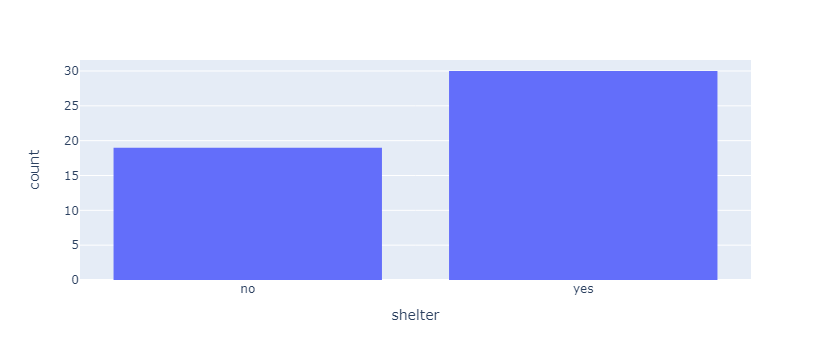

In [23]:
import plotly.express as px

fig = px.histogram(gdf, x="shelter")
fig.show()
